In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from skimage import io
from sklearn.feature_selection import VarianceThreshold

In [2]:
def transpose_large_csv(input_file, output_file):
    try:
       
        df = pd.read_csv(input_file, header=None)

       
        df_transposed = df.T  # Transposing the DataFrame

        # Saving the transposed DataFrame to a new csv file
        df_transposed.to_csv(output_file, index=False, header=False)

        print("Transposition successful. Output saved to:", output_file)

    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    input_file_path = r"big_table.csv"
    output_file_path = r"transposed_table.csv"

    transpose_large_csv(input_file_path, output_file_path)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16828\3175478361.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

Transposition successful. Output saved to: transposed_table.csv


In [3]:
transposed_table = pd.read_csv("transposed_table.csv")
print(transposed_table.head())

  gene_id      A1BG  A1CF   A2BP1         A2M   A2ML1   A4GALT   A4GNT  AACSL  \
0     UVM  167.0072   0.0  2.0429  55582.4821  0.0000  77.1195  1.0215    0.0   
1     UVM  279.3918   0.0  4.3836  65263.3808  2.7397  77.2603  0.5479    0.0   
2     UVM  879.7007   0.0  0.0000  62152.4380  0.0000  69.3431  0.0000    0.0   
3     UVM  327.1395   0.0  1.5848  56005.1585  0.0000  30.9033  0.0000    0.0   
4     UVM  178.4917   0.0  0.0000  33592.7413  0.5950  30.3436  0.0000    0.0   

   AADAC  ...     ZPLD1   ZSCAN1  ZSCAN10  ZSCAN12P1    ZSCAN18  ZSCAN23  \
0    0.0  ...    5.1073   0.5107      0.0     1.1185   501.5322   5.1073   
1    0.0  ...   12.6027   0.0000      0.0     5.8521   288.2192   1.0959   
2    0.0  ...    5.1095  13.1387      0.0    41.7956  2364.2336   5.1095   
3    0.0  ...  108.5578   9.5087      0.0    11.1807  1397.7813   1.5848   
4    0.0  ...    0.5950   0.0000      0.0     6.7351    73.7766   0.5950   

   ZSCAN4    ZSWIM5     ZWINT  ZYG11A  
0  0.0000   50.5

In [4]:
transposed_table = pd.DataFrame(transposed_table)

In [5]:
df = pd.DataFrame(transposed_table)


gene_id_column = df["gene_id"] # Extracting gene_id column that stands for class labels


transformed_data = df.iloc[:, 1:].apply(lambda x: np.log2(x + 1)) # Applying the transformation y = log2(x + 1)


transformed_data = transformed_data.applymap(lambda x: 0 if x < 1 else x) # Setting values lower than 1 to 0


transformed_data.insert(0, "gene_id", gene_id_column) # Adding back the gene_id column extract to perform transformation on the gene columns without touching the class labels/gene_id

print(transformed_data)

# Saving the transformed data to a CSV file
output_directory = r'C:\Users\Administrator\Desktop\Folder'
output_filename = "transformed_data.csv"
output_path = f"{output_directory}/{output_filename}"
transformed_data.to_csv(output_path, index=False)

print(f"Transformed data saved to {output_path}")

      gene_id       A1BG      A1CF     A2BP1        A2M     A2ML1     A4GALT  \
0         UVM   7.392379  0.000000  1.605447  15.762369  0.000000   6.287611   
1         UVM   8.131300  0.000000  2.428571  15.994008  1.902923   6.290209   
2         UVM   9.782508  0.000000  0.000000  15.923547  0.000000   6.136337   
3         UVM   8.358165  0.000000  1.370053  15.773298  0.000000   4.995634   
4         UVM   7.487773  0.000000  0.000000  15.035905  0.000000   4.970099   
...       ...        ...       ...       ...        ...       ...        ...   
10441     ACC   5.442522  0.000000  0.000000  13.974465  7.057708   7.520553   
10442     ACC  10.664513  0.000000  2.425540  12.753775  3.819341   7.498950   
10443     ACC   6.553599  3.685301  0.000000  18.141411  3.381505   8.390779   
10444     ACC   9.473941  0.000000  5.245458  14.126789  0.000000   9.655356   
10445     ACC   7.260945  1.139404  2.890525  13.526562  0.000000  11.599189   

          A4GNT     AACSL     AADAC  ..

In [6]:
# Loading the transformed data from the saved CSV file
loaded_data = pd.read_csv(output_path)

# Getting the number of rows and columns in the dataset
num_rows = loaded_data.shape[0]
num_columns = loaded_data.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 10446
Number of columns: 10363


In [9]:
from PIL import Image

# Loading the transformed data csv file
data_path = r'C:\Users\Administrator\Desktop\Folder\transformed_data.csv'
df = pd.read_csv(data_path)

# Reshaping the data into a 102 x 102 image by adding zeros at the end of the images/last line of the images
image_size = 102
num_images = len(df)
num_features = len(df.columns) - 1
remaining_elements = image_size * image_size - num_features
padding_data = np.zeros((num_images, remaining_elements))

reshaped_data = np.hstack((df.iloc[:, 1:].to_numpy(), padding_data))
reshaped_data = reshaped_data.reshape(num_images, image_size, image_size)

# Normalizing the images to the range [0, 255] and converting to uint8
reshaped_data_normalized = (reshaped_data - reshaped_data.min()) / (reshaped_data.max() - reshaped_data.min()) * 255
reshaped_data_normalized = reshaped_data_normalized.astype(np.uint8)

# Creating a folder to save the images if it doesn't exist
save_folder = "image_folder"
os.makedirs(save_folder, exist_ok=True)

# Saving the images
for i, image in enumerate(reshaped_data_normalized):
    image_path = os.path.join(save_folder, f"{i}.png")
    image = Image.fromarray(image)
    image = image.convert("L") 
    image.save(image_path)

print("Images saved successfully!")



Images saved successfully!


In [14]:
from PIL import Image
import shutil

# Organizing images into subfolders based on their labels
labels = df["gene_id"].tolist()  #"gene_id" is the column with class labels

# Creating a directory to store the image class-wise
class_images_folder = os.path.join(save_folder, 'class_images')
os.makedirs(class_images_folder, exist_ok=True)

# Mapping each class names to their corresponding label indexes
class_name_to_label = {class_name: label_index for label_index, class_name in enumerate(np.unique(labels))}

# Saving the images into their respective class subfolders
for i, (image, label) in enumerate(zip(reshaped_data_normalized, labels)):
    class_label = class_name_to_label[label]
    class_folder_path = os.path.join(class_images_folder, str(class_label))
    os.makedirs(class_folder_path, exist_ok=True) 
    image_path = os.path.join(class_folder_path, f'{i}.png')
    image = Image.fromarray(image)
    image = image.convert("L")  
    image.save(image_path)

# Printing the images class-wise with their corresponding labels
for class_name, class_label in class_name_to_label.items():
    class_folder = os.path.join(class_images_folder, str(class_label))
    class_images = os.listdir(class_folder)
    print(f'Class: {class_name} (Label: {class_label})')
    print(f'Number of images: {len(class_images)}')
    print(f'Example image filenames: {class_images[:5]}')
    print()



Class: ACC (Label: 0)
Number of images: 79
Example image filenames: ['10367.png', '10368.png', '10369.png', '10370.png', '10371.png']

Class: BLCA (Label: 1)
Number of images: 427
Example image filenames: ['10000.png', '10001.png', '10002.png', '10003.png', '10004.png']

Class: BRCA (Label: 2)
Number of images: 1212
Example image filenames: ['8728.png', '8729.png', '8730.png', '8731.png', '8732.png']

Class: CESC (Label: 3)
Number of images: 309
Example image filenames: ['8419.png', '8420.png', '8421.png', '8422.png', '8423.png']

Class: CHOL (Label: 4)
Number of images: 45
Example image filenames: ['8374.png', '8375.png', '8376.png', '8377.png', '8378.png']

Class: COAD (Label: 5)
Number of images: 328
Example image filenames: ['8046.png', '8047.png', '8048.png', '8049.png', '8050.png']

Class: DLBC (Label: 6)
Number of images: 48
Example image filenames: ['7998.png', '7999.png', '8000.png', '8001.png', '8002.png']

Class: ESCA (Label: 7)
Number of images: 196
Example image filenames:

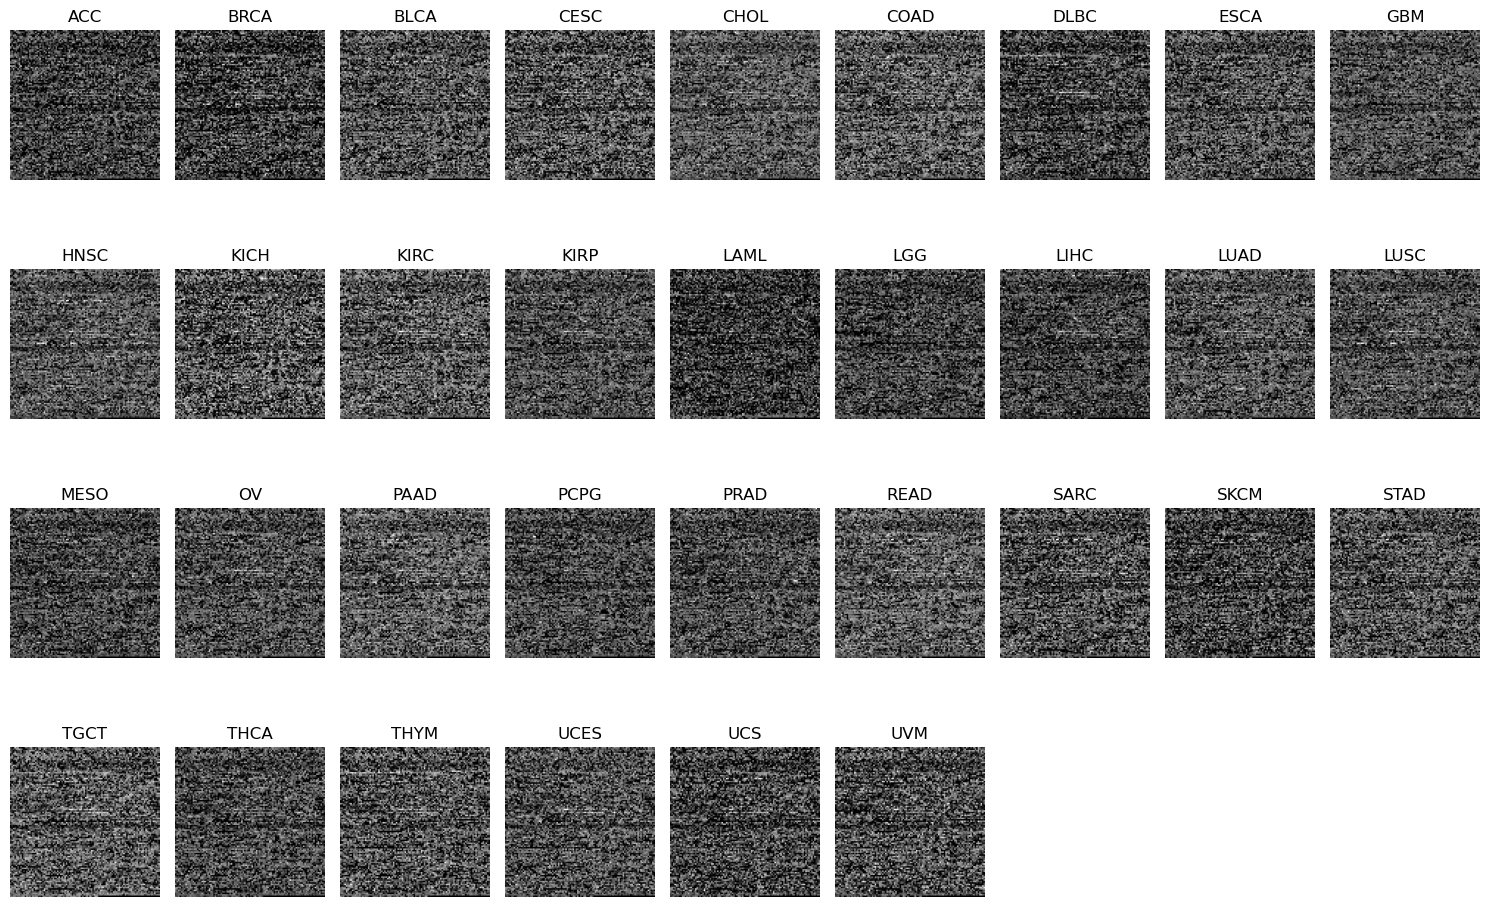

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

# The Path to the folder containing the class-wise images
class_images_folder = r'C:\Users\Administrator\Desktop\Folder\image_folder\class_images'

# Mapping each class labels their class names and representing them with a numericl values
class_label_mapping = {
    'ACC': 0,
    'BLCA': 1,
    'BRCA': 2,
    'CESC': 3,
    'CHOL': 4,
    'COAD': 5,
    'DLBC' : 6,
    'ESCA' : 7,
    'GBM' : 8,
    'HNSC' : 9,
    'KICH' : 10,
    'KIRC' : 11,
    'KIRP' : 12,
    'LAML' : 13,
    'LGG' : 14,
    'LIHC' : 15,
    'LUAD' : 16,
    'LUSC' : 17,
    'MESO' : 18,
    'OV' :   19,
    'PAAD' : 20,
    'PCPG' : 21,
    'PRAD' : 22,
    'READ' : 23,
    'SARC' : 24,
    'SKCM' : 25,
    'STAD' : 26,
    'TGCT' : 27,
    'THCA' : 28,
    'THYM' : 29,
    'UCES' : 30,
    'UCS' : 31,
    'UVM' : 32
    
}

# Creating a figure for the plot
plt.figure(figsize=(15, 10))

for class_name, class_label in class_label_mapping.items():
    class_path = os.path.join(class_images_folder, str(class_label))
    class_images = os.listdir(class_path)
    
    if len(class_images) > 0:
        image_path = os.path.join(class_path, class_images[0])
        image = Image.open(image_path)
        
        image = image.convert("L")
        
        # Plotting the images
        plt.subplot(4, 9, class_label + 1)  
        plt.imshow(image, cmap='gray')
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
#pip install split-folders
import splitfolders  # or import split_folders

input_folder = r"C:\Users\Administrator\Desktop\Folder\image_folder\class_images"
output_folder = r"C:\Users\Administrator\Desktop\Folder\image_folder\class_images\split"

splitfolders.ratio(input_folder, output=output_folder, 
                   seed=10, ratio=(.8, .1, .1), 
                   group_prefix=None) # default values

Copying files: 10446 files [00:26, 388.40 files/s] 
